This notebook presents the steps to generate the spectrograms for the kinematic signals 

@author: David Sanchez <davsanch@inf.uc3m.es>
@author: Daniel Amigo <damigo@inf.uc3m.es>
@author: Paco Fariña  <franciscofarinasalguero@gmail.com>

In [1]:
import torch
import numpy as np 
import  pywt
import numpy as np
import matplotlib.pyplot as plt
from  utils import _calculateMagnitude,_calculateAcceleration, _movement_flight_features, _filter_by_duration,_plot_spectrogram
from  utils import _flight_spectrogram
import pandas as pd
import librosa
print("hello world!")

hello world!


Define data for the spectrogram to be generated

In [2]:
from scipy import signal
import pandas as pd

TRAJ0="000a37d8-8ff4-47a0-8fe6-6095ef030b7a.csv"
TRAJ_LAST="fffc70f2-6424-448a-87be-1dc545c0f218.csv"
DATA_PATH= "C:/Users/pacofarina/Documents/TFM/dataset/finalisimov2/"
METADATA_PATH= "C:/Users/pacofarina/Documents/TFM/dataset/Dataset final.csv"

traj= pd.read_csv(DATA_PATH+TRAJ0)
traj_last= pd.read_csv(DATA_PATH+TRAJ_LAST)
metadata= pd.read_csv(METADATA_PATH)

In [3]:
metadata.columns

Index(['ULG', 'Error', 'Model', 'SYS_NAME', 'VER_HW', 'VER_FW', 'Distance',
       'Duration', 'NumPoints', 'notEnoughMovementXAxis',
       'notEnoughMovementYAxis', 'notEnoughMovementZAxis', 'bigTimeJump',
       'bigPositionJump', 'OR ENOUGH MOV', 'ModelName', 'Simulation',
       'General', 'Class', 'Num arms'],
      dtype='object')

661.0


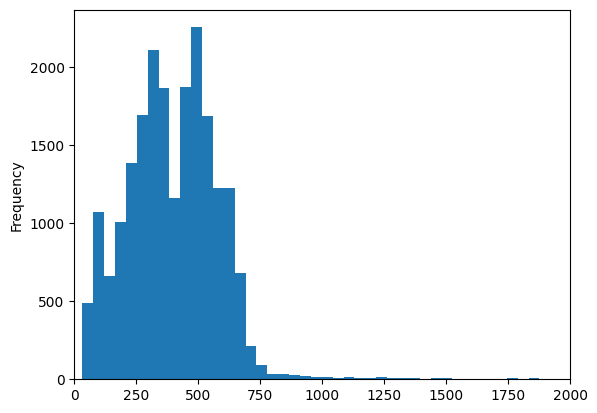

In [3]:
metadata["Duration"].plot.hist(xlim=(0,2000),bins=100,ylabel="datapoints")

print(metadata["Duration"].quantile(0.95))



In [7]:
def calculateAcceleration( df: pd.DataFrame) -> pd.DataFrame:
    
    #we want it in m/s^2 and timestamp is in microseconds
    df["ax"]= df["vx"].diff()/(df["timestamp"].diff()/np.power(10,6))
    df["ay"]= df["vy"].diff()/(df["timestamp"].diff()/np.power(10,6))
    df["az"]= df["vz"].diff()/(df["timestamp"].diff()/np.power(10,6))

    #replace nan in first position by next value
    df["ax"][0]=df["ax"][1]
    df["ay"][0]=df["ax"][1]
    df["az"][0]=df["ax"][1]
    


    return df



def calculateMagnitude(xcomp,ycomp,zcomp):


    return np.sqrt(np.power(xcomp,2)+np.power(ycomp,2)+np.power(zcomp,2))

def _create_scaleogram(signal: np.ndarray) -> np.ndarray:
    """Creates scaleogram for signal, and returns it.

    The resulting scaleogram represents scale in the first dimension, time in
    the second dimension, and the color shows amplitude.
    """
    n = len(signal)  # 128

    # In the PyWavelets implementation, scale 1 corresponds to a wavelet with
    # domain [-8, 8], which means that it covers 17 samples (upper - lower + 1).
    # Scale s corresponds to a wavelet with s*17 samples.
    # The scales in scale_list range from 1 to 16.75. The widest wavelet is
    # 17*16.75 = 284.75 wide, which is just over double the size of the signal.
    scale_list = np.arange(start=0, stop=n) / 8 + 1  # 128
    wavelet = "gaus1"
    scaleogram = pywt.cwt(signal, scale_list, wavelet)[0]
    return scaleogram


def _create_spectrogram(traj: np.ndarray):
    
    return signal.spectrogram(traj, fs=10)



    

In [4]:
traj= _movement_flight_features(traj)

In [9]:





scaleogram_vx= _create_scaleogram(traj["vx"])

scaleogram_vy= _create_scaleogram(traj["vy"])

scaleogram_vz= _create_scaleogram(traj["vz"])
scaleogram_vmag= _create_scaleogram(traj["vmag"])


scaleogram_ax= _create_scaleogram(traj["ax"])

scaleogram_ay= _create_scaleogram(traj["ay"])

scaleogram_az= _create_scaleogram(traj["az"])
scaleogram_amag= _create_scaleogram(traj["amag"])


KeyboardInterrupt: 

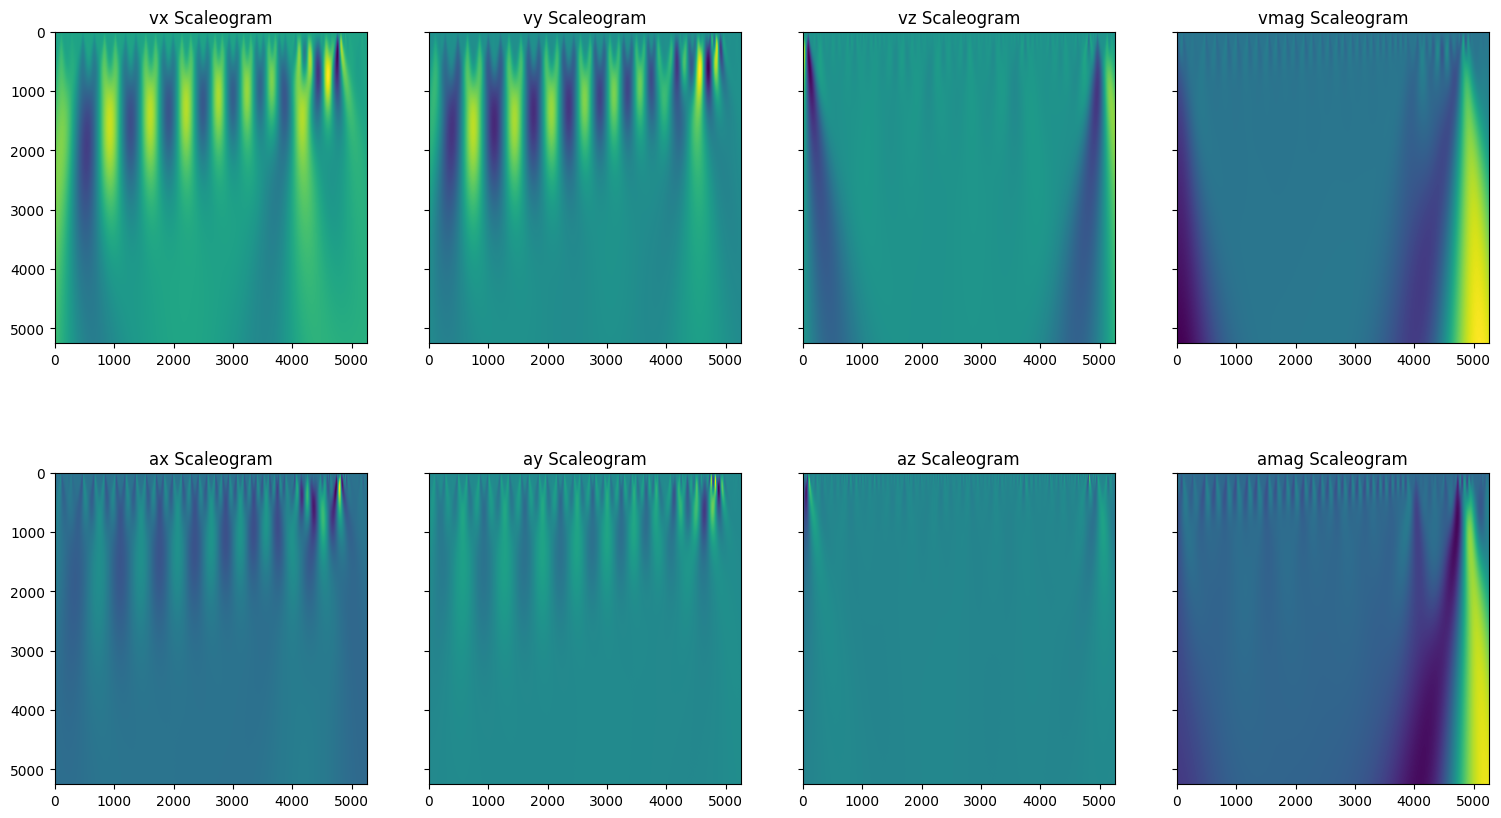

In [ ]:






f, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, sharey=True)
f.set_size_inches(18.5, 10.5, forward=True)

ax1.imshow(scaleogram_vx)
ax1.set_title("vx Scaleogram")
ax2.imshow(scaleogram_vy)
ax2.set_title("vy Scaleogram")

ax3.imshow(scaleogram_vz)
ax3.set_title("vz Scaleogram")
ax4.imshow(scaleogram_vmag)
ax4.set_title("vmag Scaleogram")

ax5.imshow(scaleogram_ax)
ax5.set_title("ax Scaleogram")
ax6.imshow(scaleogram_ay)
ax6.set_title("ay Scaleogram")

ax7.imshow(scaleogram_az)
ax7.set_title("az Scaleogram")
ax8.imshow(scaleogram_amag)
ax8.set_title("amag Scaleogram")


plt.show() 

TypeError: 'str' object is not callable

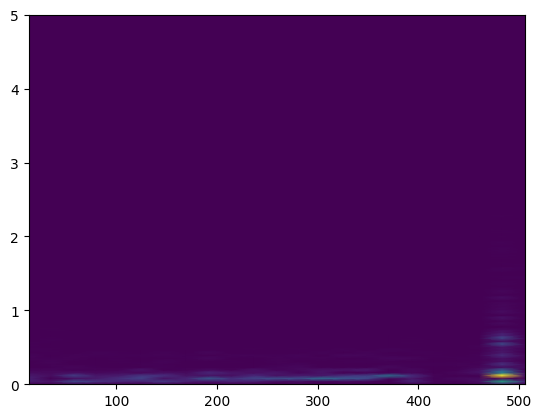

In [ ]:
f, t, Sxx=  _create_spectrogram(traj["amag"])

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.ylim((0,1.75))

plt.show()

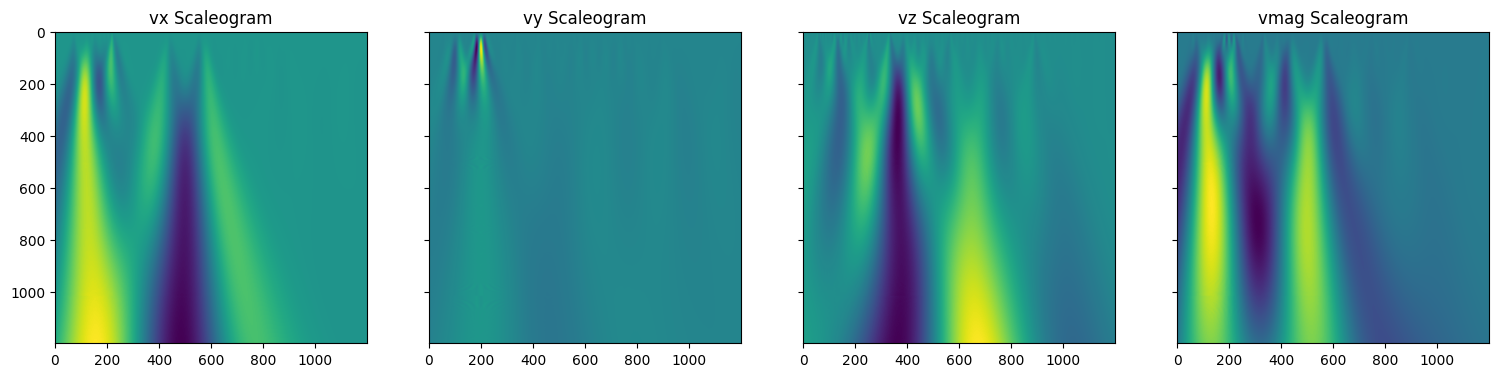

In [ ]:

import matplotlib.pyplot as plt


f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True)
f.set_size_inches(18.5, 10.5, forward=True)

ax1.imshow(last_scaleogram_vx)
ax1.set_title("vx Scaleogram")
ax2.imshow(last_scaleogram_vy)
ax2.set_title("vy Scaleogram")

ax3.imshow(last_scaleogram_vz)
ax3.set_title("vz Scaleogram")
ax4.imshow(last_scaleogram_vmag)
ax4.set_title("vmag Scaleogram")

plt.show() 

In [5]:
print(type(traj["amag"].to_numpy()))

<class 'numpy.ndarray'>


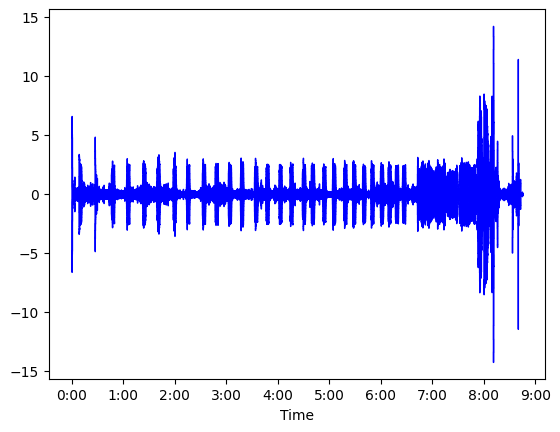

In [ ]:

import librosa
import librosa.display



# play with hop_length and nfft values
hop_length = 128
n_fft = 256
cmap = 'jet'
bins_per_octave = 12
auto_aspect = False
y_axis = "linear"  # linear or log
fmin = None
fmax = 5.0



# Waveplot
fig, ax = plt.subplots()
librosa.display.waveshow(traj["amag"].to_numpy(), sr=10, max_points=5000,
                         x_axis='time', offset=0, color='b', ax=ax)
#plt.savefig('waveplot.png', bbox_inches='tight', dpi=300)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


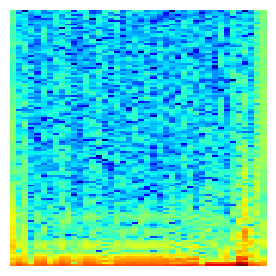

In [5]:
# Librosa spectrogram
sr=10
hop_length=128
n_fft=256

D = librosa.amplitude_to_db(
    np.abs(librosa.stft(traj["amag"].to_numpy(), hop_length=hop_length, n_fft=n_fft)), ref=np.max)

# D=librosa.feature.melspectrogram(traj["amag"].to_numpy(), sr=0.1)
y_axis = "linear"
cmap="jet"
bins_per_octave = 12
auto_aspect = False
fmin=None
fmax=None
fig, ax = plt.subplots()

img = librosa.display.specshow(D, y_axis=y_axis, sr=sr,
                               hop_length=hop_length, x_axis='time', ax=ax, cmap=cmap, bins_per_octave=bins_per_octave,
                               auto_aspect=auto_aspect)

if fmin is not None:
    fmin0 = fmin
else:
    fmin0 = 0

if fmax is not None:
    fmax0 = fmax
else:
    fmax0 = sr/2

ax.set_ylim([fmin, fmax])
ax.legend().remove()
#fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.axis('off')
dpi=100
fig.set_size_inches(331/dpi, 333/dpi)
plt.savefig('spectrogram.jpeg', bbox_inches='tight', dpi=dpi,pad_inches=0)


plt.show()


tensor([[[0.4588, 0.4196, 0.4745,  ..., 0.4980, 0.4510, 0.4196],
         [0.3961, 0.3608, 0.4235,  ..., 0.5216, 0.4902, 0.4706],
         [0.2471, 0.2549, 0.3608,  ..., 0.5294, 0.5412, 0.5412],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9922, 1.0000,  ..., 0.9961, 0.9216, 0.8863],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9176, 0.8902]],

        [[0.9765, 0.9373, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9686, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9804, 0.9647, 0.9569],
         ...,
         [0.6471, 0.6353, 0.6549,  ..., 0.6118, 0.6235, 0.6314],
         [0.5176, 0.5098, 0.5333,  ..., 0.5647, 0.5843, 0.6039],
         [0.5098, 0.5098, 0.5333,  ..., 0.5843, 0.6196, 0.6510]],

        [[0.6392, 0.6000, 0.6627,  ..., 0.3843, 0.4118, 0.4235],
         [0.6157, 0.5725, 0.6353,  ..., 0.4431, 0.4588, 0.4706],
         [0.5451, 0.5451, 0.6353,  ..., 0.5137, 0.5255, 0.

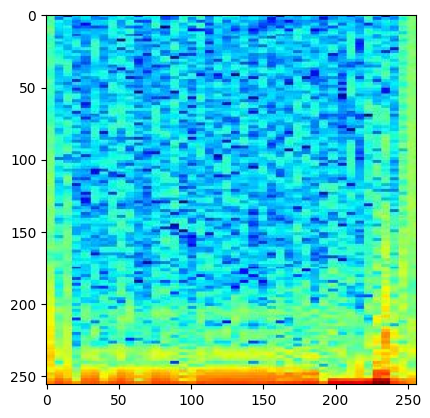

In [90]:
# Import required libraries
import torch
import cv2
import torchvision.transforms as transforms
  
# Read the image
image = cv2.imread('spectrogram.jpeg')
  
# Convert BGR image to RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('image',image)
# Define a transform to convert
# the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])
  
# Convert the image to Torch tensor
tensor = transform(image)
  
# print the converted image tensor




AttributeError: 'NoneType' object has no attribute 'remove'

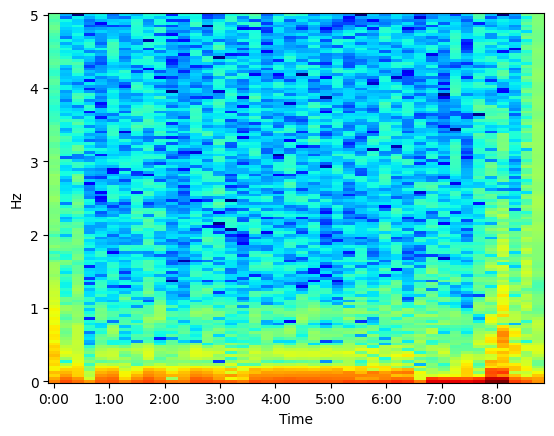

In [8]:
D= _flight_spectrogram(traj)

_plot_spectrogram(D)

In [10]:
D.shape

(129, 42)

In [8]:
filtered_df= metadata[metadata["NumPoints"]>300]
print(len(filtered_df))
print(len(metadata))

filtered_df.groupby("Class").count()




20977
20993


,ULG,Error,Model,SYS_NAME,VER_HW,VER_FW,Distance,Duration,NumPoints,notEnoughMovementXAxis,notEnoughMovementYAxis,notEnoughMovementZAxis,bigTimeJump,bigPositionJump,OR ENOUGH MOV,ModelName,Simulation,General,Num arms
Class,,,,,,,,,,,,,,,,,,,
Flying Wing,529,529,529,529,529,234,529,529,529,529,529,529,529,529,529,529,529,529,529
Hexarotor +,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Hexarotor Coaxial,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Hexarotor x,428,428,428,428,428,333,428,428,428,428,428,428,428,428,428,428,428,428,428
Octorotor +,11,11,11,11,11,10,11,11,11,11,11,11,11,11,11,11,11,11,11
Octorotor Coaxial,85,85,85,85,85,51,85,85,85,85,85,85,85,85,85,85,85,85,85
Octorotor x,10,10,10,10,10,4,10,10,10,10,10,10,10,10,10,10,10,10,10
Plane A-Tail,29,29,29,29,29,18,29,29,29,29,29,29,29,29,29,29,29,29,29
Plane V-Tail,27,27,27,27,27,6,27,27,27,27,27,27,27,27,27,27,27,27,27


In [10]:
filtered_df["NumPoints"].sum()/300

274375.12

In [21]:


size = 300      # 6 rows in a new data-frame
split_dfs = [traj.loc[i:i+size-1,:] for i in range(0, len(traj),size-10) if i <len(traj)-10]

for l_d in split_dfs:
    print (l_d)

      timestamp          x          y          z        vx        vy  \
0           0.0  -2.676322  -0.685026  -0.400773  0.161663  0.148411   
1      100925.0  -2.659505  -0.690402  -0.495470  0.196644  0.159487   
2      204755.0  -2.638667  -0.700292  -0.659962  0.228960  0.121223   
3      305830.0  -2.617136  -0.711956  -0.863335  0.213436  0.103057   
4      405554.0  -2.600583  -0.721810  -1.108964  0.195864  0.104169   
..          ...        ...        ...        ...       ...       ...   
295  30747223.0 -77.513130 -60.704872 -35.079250 -4.799995  0.126390   
296  30847996.0 -78.004860 -60.693855 -35.059315 -4.798779  0.118824   
297  30952889.0 -78.513920 -60.682667 -35.044830 -4.803813  0.107779   
298  31052806.0 -79.008490 -60.669030 -35.026790 -4.829556  0.113248   
299  31156799.0 -79.523730 -60.655910 -35.002834 -4.845526  0.073096   

           vz      vmag        ax        ay        az      amag  
0   -0.615150  0.653123  0.346601  0.346601  0.346601  6.604004  
1  

In [69]:
for df in split_dfs:
    print(len(df))

300
300
300


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


300


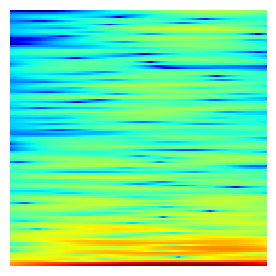

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


300


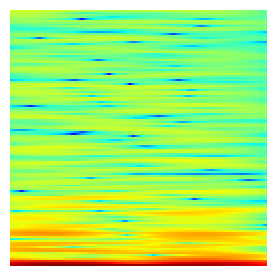

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


300


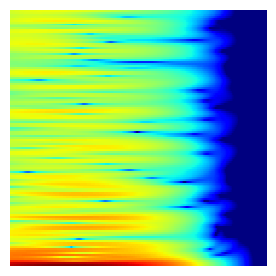

In [19]:
import pandas as pd


for i in range(100,101):
    flights_merged= pd.read_csv(DATA_PATH+ filtered_df["ULG"].iloc[i]+".csv")
    flights_merged= _movement_flight_features(flights_merged)

    size = 300      # 300 rows in a new data-frame
    split_dfs = [flights_merged.loc[i:i+size-1,:] for i in range(0, len(flights_merged),size-10) if i <len(flights_merged)-10]
   
    while len(split_dfs[-1])<300:
        df2 = pd.DataFrame([[0]*split_dfs[-1].shape[1]],columns=split_dfs[-1].columns)
        split_dfs[-1] = split_dfs[-1].append(df2, ignore_index=True)

    for flight in split_dfs:
        print(len(flight))
        
        D= _flight_spectrogram(flight)
        y_axis = "linear"
        cmap="jet"
        bins_per_octave = 12
        auto_aspect = False
        fmin=None
        fmax=None
        sr=1
        hop_length=256
        n_fft=2048
        fig, ax = plt.subplots()

        img = librosa.display.specshow(D, y_axis=y_axis, sr=1,
                                    hop_length=hop_length, x_axis='time', ax=ax, cmap=cmap, bins_per_octave=bins_per_octave,
                                    auto_aspect=auto_aspect)

        if fmin is not None:
            fmin0 = fmin
        else:
            fmin0 = 0

        if fmax is not None:
            fmax0 = fmax
        else:
            fmax0 = sr/2

        ax.set_ylim([fmin, fmax])
        ax.legend().remove()
        #fig.colorbar(img, ax=ax, format="%+2.f dB")
        plt.axis('off')
        dpi=100
        fig.set_size_inches(331/dpi, 333/dpi)
        #plt.savefig('spectrogram.jpeg', bbox_inches='tight', dpi=dpi,pad_inches=0)


        plt.show()
    
  








In [6]:
import os

for folder in os.listdir("../Data/Spectrogram Datasets/Overlapping/size300_overlap10"):

    print(folder)

Flying Wing
Hexarotor +
Hexarotor Coaxial
Hexarotor x
Octorotor Coaxial
Octorotor x
Plane A-Tail
Plane V-Tail
Quadrotor Wide
Quadrotor x
VTOL


In [11]:
import shutil

src_dir = "../Data/Spectrogram Datasets/Overlapping/size300_overlap10"
dst_dir = os.path.join(src_dir, "combined")

    # Define the classes to be combined
classes = {
        "Hexarotor": ["Hexarotor +", "Hexarotor Coaxial", "Hexarotor x"],
        "Octorotor": ["Octorotor Coaxial", "Octorotor x","Octorotor +"],
        "Plane": ["Plane A-Tail", "Plane V-Tail", "Flying Wing"],
        "Quadrotor": ["Quadrotor Wide", "Quadrotor x","Quadrotor H"],
        "VTOL": ["VTOL"]
}

    # Create the destination directory if it doesn't exist
if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)

    # Loop through the classes
for class_name, class_dirs in classes.items():
        # Create the class directory in the destination
        class_dir = os.path.join(dst_dir, class_name)
        if not os.path.exists(class_dir):
            os.mkdir(class_dir)
        # Loop through the source directories for the class
        for class_dir_src in class_dirs:
            # Combine the source and destination paths
            class_dir_src = os.path.join(src_dir, class_dir_src)
            # Loop through the files in the source directory
            for filename in os.listdir(class_dir_src):
                # Combine the source and destination paths
                src_path = os.path.join(class_dir_src, filename)
                dst_path = os.path.join(class_dir, filename)
                # Copy the file to the destination
                shutil.copy(src_path, dst_path)

In [11]:
import os

# Define the directories
src_dir = "../Data/Spectrogram Datasets/Overlapping/size300_overlap10"
dst_dir = os.path.join(src_dir, "combined")

# Loop through the original directories and count the number of files
original_counts = {}
original_total = 0
for class_dir in os.listdir(src_dir):
    count = len(os.listdir(os.path.join(src_dir, class_dir)))
    original_counts[class_dir] = count
    original_total += count

# Loop through the combined directories and count the number of files
combined_counts = {}
combined_total = 0
for class_dir in os.listdir(dst_dir):
    count = len(os.listdir(os.path.join(dst_dir, class_dir)))
    combined_counts[class_dir] = count
    combined_total += count

# Print the counts
print("Original counts:")
print(original_counts)
print(f"Original total: {original_total}")
print("Combined counts:")
print(combined_counts)
print(f"Combined total: {combined_total}")

# Check that the totals are the same
if original_total == combined_total:
    print("The totals match.")
else:
    print("The totals do not match.")

# Check that the sums for each class are the same
original_sums = sum(original_counts.values())
combined_sums = sum(combined_counts.values())
if original_sums == combined_sums:
    print("The sums match.")
else:
    print("The sums do not match.")


Original counts:
{'combined': 5, 'Flying Wing': 6, 'Hexarotor +': 1, 'Hexarotor Coaxial': 1, 'Hexarotor x': 10, 'Octorotor Coaxial': 9, 'Octorotor x': 2, 'Plane A-Tail': 1, 'Plane V-Tail': 2, 'Quadrotor Wide': 2, 'Quadrotor x': 314, 'VTOL': 8}
Original total: 361
Combined counts:
{'Hexarotor': 12, 'Octorotor': 11, 'Plane': 11, 'Quadrotor': 316, 'VTOL': 8}
Combined total: 358
The totals do not match.
The sums do not match.


In [10]:
class_dir == "Flying Wing"

        # Add the Flying Wing files to the Plane directory
for filename in os.listdir(os.path.join(src_dir, class_dir)):
            src_path = os.path.join(src_dir, class_dir, filename)
            dst_path = os.path.join(dst_dir, "Plane", filename)
            shutil.copy(src_path, dst_path)

In [ ]:
metadata= pd.read_csv(METADATA_PATH)
filtered_df= metadata[metadata["NumPoints"]>300]

  



for filename, label in zip(filtered_df["ULG"], filtered_df["Class"]):

        if os.path.exists("Data/Spectrogram Datasets/Overlapping/size300_overlap10/"+label)==False:
            os.mkdir("Data/Spectrogram Datasets/Overlapping/size300_overlap10/"+ label)
        
        size = 300      # 300 rows in a new data-frame
        full_flight= pd.read_csv(DATA_PATH+ filename+".csv")[0:299]
        split_dfs = [full_flight.loc[i:i+size-1,:] for i in range(0, len(full_flight),size-10) if i <len(full_flight)-10]
        
        while len(split_dfs[-1])<size:
            df2 = pd.DataFrame([[0]*split_dfs[-1].shape[1]],columns=split_dfs[-1].columns)
            split_dfs[-1] = split_dfs[-1].append(df2, ignore_index=True)


In [2]:
import os
import glob

path = "../Data/Spectrogram Datasets/Overlapping/size300_overlap10"
picture_count = 0

# Use the os.walk function to iterate through all subdirectories and their files
for dirpath, dirnames, filenames in os.walk(path):
    # Use glob to find all picture files in the current directory
    picture_files = glob.glob(os.path.join(dirpath, "*.jpeg"))
    # Add the count of picture files to the total count
    picture_count += len(picture_files)

print("Total number of pictures:", picture_count)

Total number of pictures: 272530


In [12]:
import os
import glob

path = "../Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined"

# Use the os.walk function to iterate through all subdirectories and their files
for dirpath, dirnames, filenames in os.walk(path):
    # Use glob to find all picture files in the current directory
    picture_files = glob.glob(os.path.join(dirpath, "*.jpeg"))
    # Print the directory name and the count of picture files in it
    print(f"{dirpath}: {len(picture_files)}")

../Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined: 0
../Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined\Hexarotor: 6355
../Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined\Octorotor: 725
../Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined\Plane: 10996
../Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined\Quadrotor: 250535
../Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined\VTOL: 3919


In [2]:
import torch
model = torch.load('C:/Users/pacofarina/Documents/TFM/vggish model/vggish-10086976.pth', map_location=torch.device('cpu'))
 

c:\Users\pacofarina\anaconda3\envs\TFMPaco2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
data_transforms = transforms.Compose([
    transforms.Resize(94),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Grayscale()
])

data_path = "C:/Users/pacofarina/davidUAVClassification-2/Data/Spectrogram Datasets/Overlapping/size300_overlap10/combined"
dataset = ImageFolder(data_path, transform=data_transforms)


torch.Size([1, 94, 94])


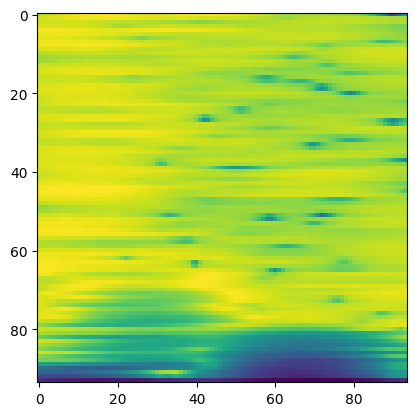

In [16]:
from matplotlib import pyplot as plt
img_tensor, label = dataset[0]

# print the shape of the image
print(img_tensor.shape)

plt.imshow(img_tensor.permute(1, 2, 0))